### **Name**: Bhavya Kakwani
### **Roll No**: 101903365
### **UCS757 - Time Series Prediction**

### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
import random

### Importing the Dataset

In [2]:
df = pd.read_excel('DATASET.xlsx')
df.head()

c:\Users\bhawya kakwani\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:300: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
c:\Users\bhawya kakwani\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:300: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2,324.0,161.1,18.2,0.0,4,106,5950,1190,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,3,324.0,170.7,18.5,0.0,4,110,5950,1190,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,4,324.0,223.9,18.9,0.0,3,110,6150,1340,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,5,324.0,228.2,18.4,0.0,2,113,6340,1450,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
j = 0

for i in range(100):
    df.iloc[j: j + 10, 0] = df.iloc[j, 0]
    j += 10

### Data Pre-Processing

In [4]:
# Renaming the first column

df.columns = df.columns.str.replace('Unnamed: 0', 'Group')

In [5]:
# Replacing the empty cells with 0

df.fillna(0, inplace=True)

In [6]:
# Extracting the Test Dataset

test = df.loc[df['year'] == 10]
test.columns = test.columns.str.replace('Unnamed: 0', 'Group')
test.head()

,Group,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
9,Sec_1,10,324.0,53.6,19.0,0.0,2,105,7567,1885,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,Sec_2,10,327.7,62.0,22.7,0.0,2,102,30525,10234,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,Sec_3,10,487.7,93.2,22.5,0.0,4,110,2140,1270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,Sec_4,10,543.6,93.2,22.5,0.0,4,110,2140,1270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49,Sec_5,10,434.4,149.0,11.7,72.0,3,110,13142,6225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Model Definition 

In [7]:
etr = ExtraTreesRegressor(n_estimators=75,bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=1500,
                    min_impurity_decrease=0.0, 
                    min_samples_leaf=1,
                    min_weight_fraction_leaf=0.1,
                    n_jobs=None, oob_score=False, random_state=123, verbose=0,
                    warm_start=False)

rf = RandomForestRegressor(n_estimators = 1200, random_state = 42)

In [8]:
predict_col_names = ['Para-9', 'Para-10', 'Para-11', 'Para-12', 'Para-13']
result = {'Para-9': [], 'Para-10': [], 'Para-11': [], 'Para-12': [], 'Para-13': []}

### Model Application

In [9]:
def selectedModel(val):
    RMSE = []
    N = 0
    index = 0

    # Applying ExtraTreesRegressor
    if(val==0):
        for j in range(10, 15):
            ans = 0
            count = 0
            for i in range(0, 1000, 10):
                # Extracting Train and Test Data
                xtrain = df.iloc[i:i+9, 1:10]
                ytrain = df.iloc[i:i+9, j]
                xtest = df.iloc[i+9, 1:10].to_numpy()
                ytest = df.iloc[i+9, j]

                # Applying Random Forest 
                etr.fit(xtrain, ytrain)

                # Predicting Values
                ypred = etr.predict(xtest.reshape(1,-1))[0]

                # Appending Results
                result[predict_col_names[index]].append(ypred)
                ans += (ytest - ypred)**2
                count += 1
                N += 1

            RMSE.append(ans)
            index += 1
            
    # Applying Random Forest    
    else:
        for j in range(10, 15):
            ans = 0
            count = 0
            for i in range(0, 1000, 10):
                # Extracting Train and Test Data
                xtrain = df.iloc[i:i+9, 1:10]
                ytrain = df.iloc[i:i+9, j]
                xtest = df.iloc[i+9, 1:10].to_numpy()
                ytest = df.iloc[i+9, j]

                # Applying Random Forest 
                rf.fit(xtrain, ytrain)

                # Predicting Values
                ypred = rf.predict(xtest.reshape(1,-1))[0]

                # Appending Results
                result[predict_col_names[index]].append(ypred)
                ans += (ytest - ypred)**2
                count += 1
                N += 1

            RMSE.append(ans)
            index += 1
    return (RMSE, count)

In [10]:
# Applying Random Forest

result_RMSE, result_count = selectedModel(1)

In [11]:
df_predicted = pd.DataFrame.from_dict(result)
df_predicted.head()

,Para-9,Para-10,Para-11,Para-12,Para-13
0,2.503750,53.327250,37.335000,7.567500,1.893025
1,56.232250,27.868583,0.894167,7.633333,0.788426
2,64.419917,0.000000,0.000000,11.291667,1.361915
3,16.055167,53.149083,57.024167,7.058333,1.798397
4,0.000000,247.708250,33.837500,5.890833,1.676832


### Calculating RMSE- 

In [12]:
# RMSE for each column

for i in result_RMSE:
    print((i/result_count)**0.5)

68.90550052037108
67.32236902145583
27.854787304081583
14.995555855310005
0.24682578505277347


In [13]:
# Final RMSE

print((sum(result_RMSE)/500)**0.5)

45.34553156984147


### Plotting Results

In [14]:
# Selecting 40 random rows

ind = []
for i in range(40):
    ind.append(random.randint(0,100))

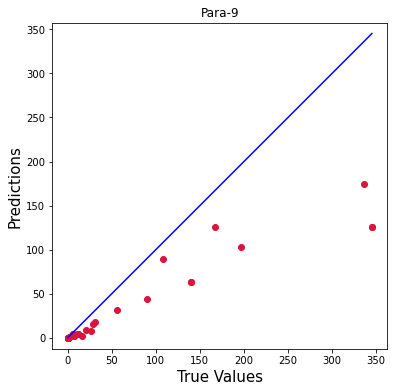

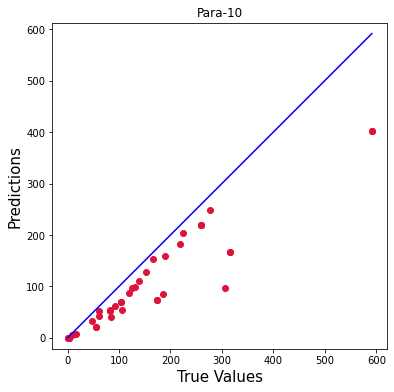

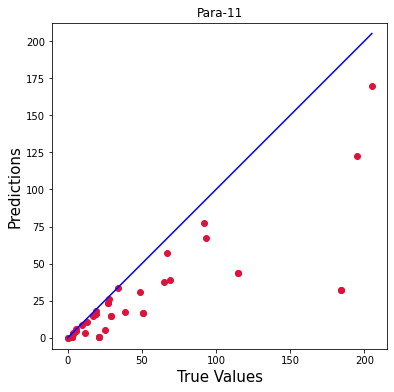

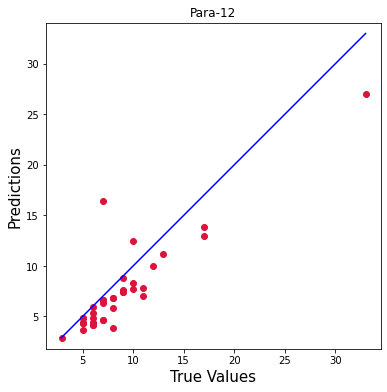

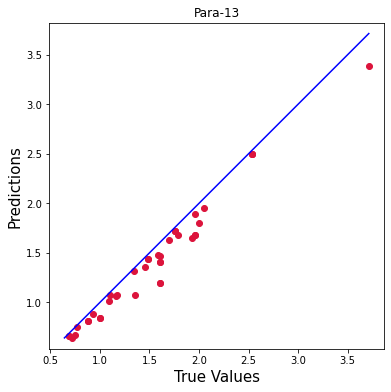

In [15]:
# Scatter plot for random 40 rows out of 100 for each target column

for i in range(5):
    plt.figure(figsize=(6,6))
    true_value = test.iloc[ind, i+10]
    predicted_value = df_predicted.iloc[ind, i]
    plt.scatter(true_value, predicted_value, c='crimson')
    p1 = max(max(predicted_value), max(true_value))
    p2 = min(min(predicted_value), min(true_value))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.title(predict_col_names[i])
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()